In [46]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Downloading data

In [48]:
# train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
# test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
# sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [49]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [51]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

# 2. Preprocessing

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from pandas.api.types import is_string_dtype

In [54]:
train['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [55]:
def preprocessing_pipe(data):
    features = data.copy(deep = True)
    
    #label encoding
    le = LabelEncoder()
    le_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']
    for col in le_cols:
        features[col] = le.fit_transform(features[col])
    
    features = pd.get_dummies(features, columns=['MTRANS'], dtype = int)
    features = features.drop(['MTRANS_Bike', 'id'], axis = 1)

    return features

In [56]:
le = LabelEncoder()
train_encoded = preprocessing_pipe(train).drop('NObeyesdad', axis = 1)
target_encoded = le.fit_transform(train['NObeyesdad'])

# 3. Prepare data for ML

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_encoded, target_encoded, test_size=0.2, stratify=target_encoded)

# 4. Fit the data with baseline models

In [60]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

In [62]:
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(class_weight = 'balanced')
clf3 = LGBMClassifier(class_weight = 'balanced')
clf4 = XGBClassifier()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2046
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
def eval_model(clf):
    y_pred_tren = clf.predict(X_train)
    y_pred_val = clf.predict(X_valid)
    train_score = np.mean(y_pred_tren == y_train)
    validation_score = np.mean(y_pred_val == y_valid)

    print('Train score', round(train_score, 3))
    print('Test score', round(validation_score, 3))

    if train_score - validation_score > 0.05:
        print('Overfitting detected')
        
    print('===========================')

In [65]:
print('Random Forest')
eval_model(clf2)

print('LightGBM')
eval_model(clf3)

print('Gradient Boosting')
eval_model(clf1)

print('XGBoost')
eval_model(clf4)

Random Forest
Train score 1.0
Test score 0.893
Overfitting detected
LightGBM
Train score 0.982
Test score 0.901
Overfitting detected
Gradient Boosting
Train score 0.922
Test score 0.904
XGBoost
Train score 0.987
Test score 0.905
Overfitting detected


# 5. Hyperparameter tuning

In [67]:
import optuna
from sklearn.model_selection import cross_validate

In [68]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 4, 10)
    n_estimators = trial.suggest_int('n_estimators', 500, 2000)
    gamma = trial.suggest_float('gamma', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 1)
    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
    subsample = trial.suggest_float('subsample', 0, 1)
    colsample_bytree = trial.suggest_float('learning_rate', 0, 1)
    learning_rate = trial.suggest_float('learning_rate', 0, 1)

    # XGBoost
    params = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'gamma': gamma,
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
              'max_depth': max_depth,
              'min_child_weight': min_child_weight,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'eval_metric':'mlogloss'}
    
    clf = XGBClassifier(**params)

    cv_results = cross_validate(clf, train_encoded, target_encoded, cv=5, scoring = 'accuracy')

    validation_score = np.mean(cv_results['test_score'])

    return validation_score

In [69]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-11 01:19:57,490] A new study created in memory with name: no-name-43622191-baca-4726-a5bc-5bfae3713d00
[I 2024-03-11 01:20:10,308] Trial 0 finished with value: 0.7690048687109774 and parameters: {'max_depth': 9, 'n_estimators': 1206, 'gamma': 0.564363974853495, 'reg_alpha': 0.8494144086309362, 'reg_lambda': 0.00011895689096741435, 'min_child_weight': 4, 'subsample': 0.0031357993935834383, 'learning_rate': 0.8354762051953776}. Best is trial 0 with value: 0.7690048687109774.
[I 2024-03-11 01:20:23,142] Trial 1 finished with value: 0.9062531998928689 and parameters: {'max_depth': 9, 'n_estimators': 857, 'gamma': 0.8880744786951312, 'reg_alpha': 0.04545309003264231, 'reg_lambda': 0.789129240493706, 'min_child_weight': 5, 'subsample': 0.7645072431026106, 'learning_rate': 0.11568228509622724}. Best is trial 1 with value: 0.9062531998928689.
[I 2024-03-11 01:20:36,178] Trial 2 finished with value: 0.8992680339347624 and parameters: {'max_depth': 9, 'n_estimators': 860, 'gamma': 0.1

In [70]:
df_study = study.trials_dataframe()
df_study = df_study.sort_values(by='value', ascending=False)

df_study.head()

,number,value,datetime_start,datetime_complete,duration,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_reg_alpha,params_reg_lambda,params_subsample,state
94,94,0.910541,2024-03-11 01:52:45.072301,2024-03-11 01:53:08.600834,0 days 00:00:23.528533,0.740620,0.251893,10,6,1956,0.404755,0.982808,0.978364,COMPLETE
46,46,0.910492,2024-03-11 01:35:20.655857,2024-03-11 01:35:38.366978,0 days 00:00:17.711121,0.802673,0.241745,9,9,1508,0.592853,0.550604,0.861679,COMPLETE
93,93,0.910396,2024-03-11 01:52:22.207519,2024-03-11 01:52:45.070301,0 days 00:00:22.862782,0.736925,0.189746,10,6,1777,0.484721,0.900348,0.974495,COMPLETE
21,21,0.910300,2024-03-11 01:27:09.348681,2024-03-11 01:27:23.021003,0 days 00:00:13.672322,0.994902,0.255773,7,7,1029,0.369498,0.916912,0.835646,COMPLETE
73,73,0.910252,2024-03-11 01:44:48.161686,2024-03-11 01:45:13.190738,0 days 00:00:25.029052,0.970025,0.172829,10,9,1719,0.323793,0.646331,0.883707,COMPLETE


In [71]:
best_params_XGB = {
    'gamma':0.740620,
    'learning_rate':0.251893,
    'max_depth': 10,
    'min_child_weight':6,
    'n_estimators':1956,
    'reg_alpha':0.404755,
    'reg_lambda':0.982808,
    'colsample_bytree': 0.47850,
    'subsample':0.978364,
}

# 6. Train the best model and export the results

In [72]:
clf = XGBClassifier(**best_params_XGB)

clf.fit(train_encoded, target_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4785, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.74062, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.251893,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1956, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [73]:
# test preprocessing
X_test = preprocessing_pipe(test)
y_pred = clf.predict(X_test)

In [80]:
df_submission = pd.read_csv('sample_submission.csv')

df_submission['NObeyesdad'] = le.inverse_transform(y_pred)

df_submission.to_csv('submission.csv', index=False)

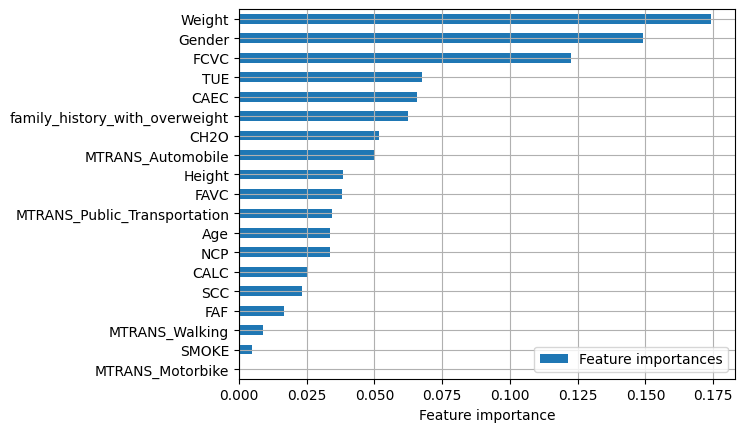

In [79]:
df_features = pd.DataFrame(clf.feature_importances_, index = X_test.columns, columns=['Feature importances'])
df_features = df_features.sort_values('Feature importances')

df_features.plot(kind='barh')
plt.grid()
plt.xlabel('Feature importance')
plt.show()